In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
# Some Bitcoin block data from 2018-11-01 to 2020-08-03
data_url = 'https://raw.githubusercontent.com/doffing81/data/main/block_data.csv'
df = pd.read_csv(data_url)
print(df.shape)
df.head()

(30129, 7)


,timestamp,block_height,size,fees,price,num_txs,weight
0,1541117175,548368,625425,0.097992,6342.376676,1033,1847379
1,1541117465,548369,1284748,0.077189,6349.313386,2416,3992809
2,1541118183,548370,1295821,0.111960,6351.560000,2053,3992941
3,1541122689,548373,1304428,0.278727,6367.184202,3031,3992995
4,1541124245,548376,1346970,0.053728,6365.880000,2138,3993345


In [3]:
# Convert timestamp into a datetime variable
df['timestamp_d'] = pd.to_datetime(df['timestamp'],unit='s').dt.date

# Add a boolean feature that says whether a block's fees are greater than or equal to 1 bitcoin
df['gte_1_btc'] = (df['fees'] < 1) == False
df['gte_1_btc'] = (df['fees'] >= 1) == True

# Add a boolean feature that says whether a block is full based on weight
df['full_block'] = (df['weight'] < 3990000) == False
df['full_block'] = (df['weight'] >= 3990000) == True
df.head()

,timestamp,block_height,size,fees,price,num_txs,weight,timestamp_d,gte_1_btc,full_block
0,1541117175,548368,625425,0.097992,6342.376676,1033,1847379,2018-11-02,False,False
1,1541117465,548369,1284748,0.077189,6349.313386,2416,3992809,2018-11-02,False,True
2,1541118183,548370,1295821,0.111960,6351.560000,2053,3992941,2018-11-02,False,True
3,1541122689,548373,1304428,0.278727,6367.184202,3031,3992995,2018-11-02,False,True
4,1541124245,548376,1346970,0.053728,6365.880000,2138,3993345,2018-11-02,False,True


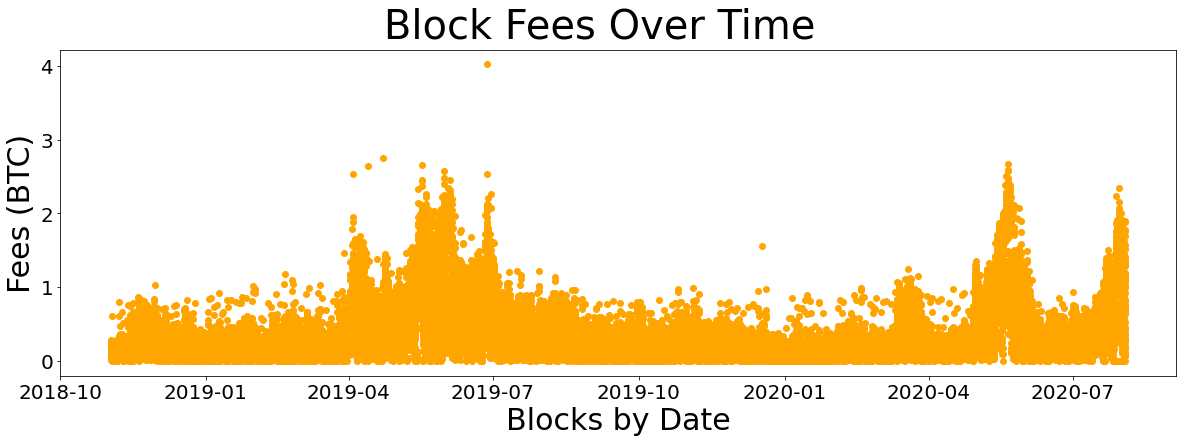

In [4]:
# A scatter plot showing fees over time
fig, ax = plt.subplots(figsize=(20,6))

fig.suptitle('Block Fees Over Time', fontsize=40)
ax.scatter(x = df['timestamp_d'], y = df['fees'], color='orange')

ax.set_ylabel('Fees (BTC)', fontsize=30)
ax.set_xlabel('Blocks by Date', fontsize=30)
ax.tick_params(axis = 'both', labelsize=20)

plt.show()

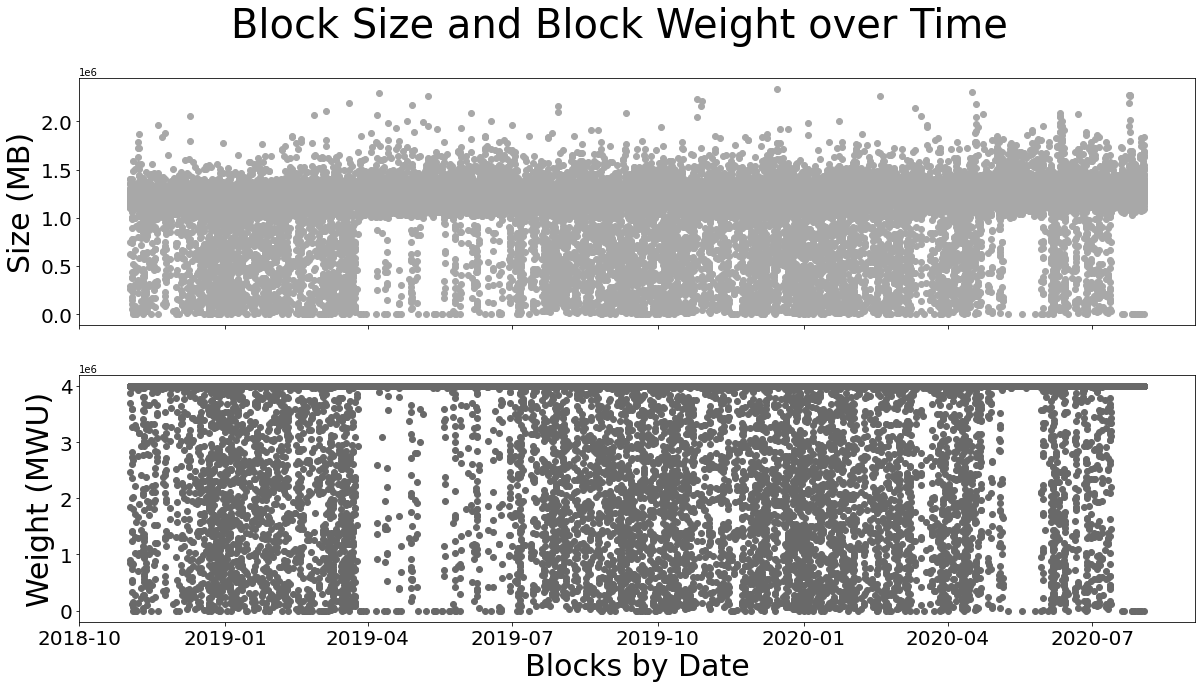

In [5]:
# A scatter plot showing size and weight over time
fig, axs = plt.subplots(2, figsize=(20,10), sharex=True) # vertical stack

fig.suptitle('Block Size and Block Weight over Time', fontsize=40)
axs[0].scatter(x = df['timestamp_d'], y = df['size'], color='#a8a8a8')
axs[1].scatter(x = df['timestamp_d'], y = df['weight'], color='#696969')

axs[0].set_ylabel('Size (MB)', fontsize=30)
axs[1].set_ylabel('Weight (MWU)', fontsize=30)
axs[1].set_xlabel('Blocks by Date', fontsize=30)
axs[0].tick_params(axis = 'both', labelsize=20)
axs[1].tick_params(axis = 'both', labelsize=20)

plt.show()

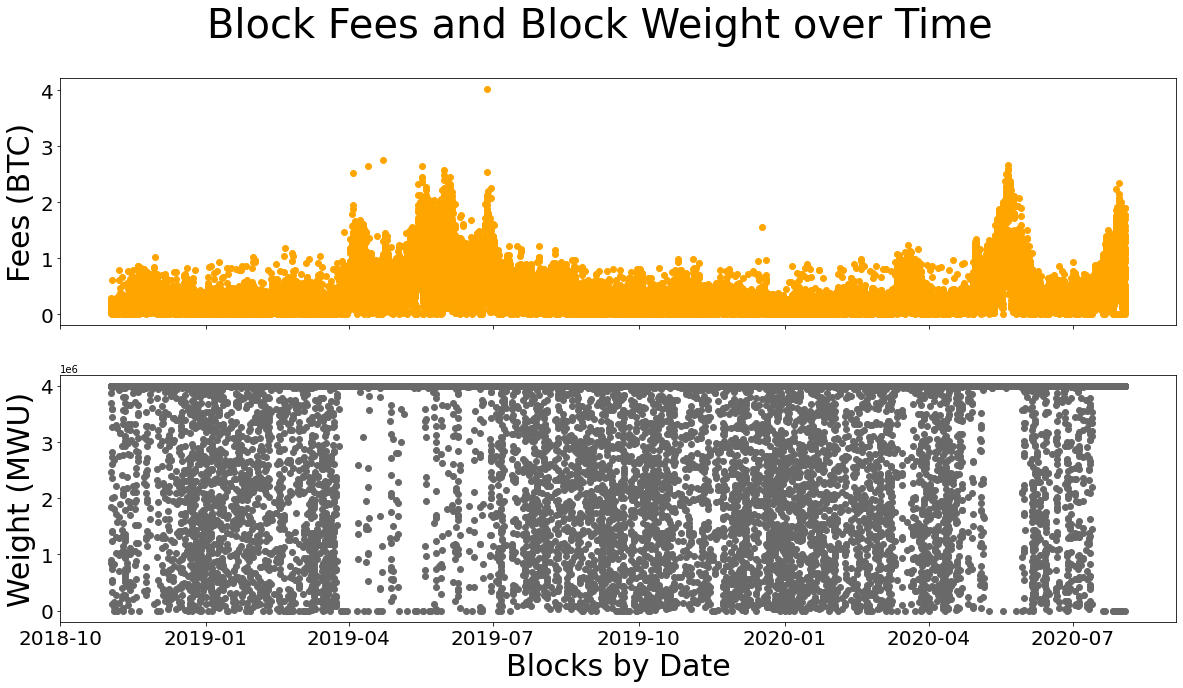

In [6]:
# A scatter plot showing fees and weight over time
fig, axs = plt.subplots(2, figsize=(20,10), sharex=True) # vertical stack

fig.suptitle('Block Fees and Block Weight over Time', fontsize=40)
axs[0].scatter(x = df['timestamp_d'], y = df['fees'], color='orange')
axs[1].scatter(x = df['timestamp_d'], y = df['weight'], color='#696969')

axs[0].set_ylabel('Fees (BTC)', fontsize=30)
axs[1].set_ylabel('Weight (MWU)', fontsize=30)
axs[1].set_xlabel('Blocks by Date', fontsize=30)
axs[0].tick_params(axis = 'both', labelsize=20)
axs[1].tick_params(axis = 'both', labelsize=20)

plt.show()

In [7]:
# A normalized contingency table showing percentages of full blocks to blocks
# with fees greater than or equal to 1 bitcoin
pd.crosstab(df['full_block'], df['gte_1_btc'], normalize=True)

gte_1_btc,False,True
full_block,,
False,0.259717,0.000066
True,0.666202,0.074015


In [8]:
# Creating sample sets to compare:
# January through the end of March &
# April through the end of June

# Timestamps
# 1546300800 = JAN
# 1554076800 = APR
# 1561939200 = JUL
jan_mar = df.loc[(df['timestamp'] >= 1546300800) & (df['timestamp'] < 1554076800)]
apr_jun = df.loc[(df['timestamp'] >= 1554076800) & (df['timestamp'] < 1561939200)]

In [9]:
# Print the relevant values of the samples
print(jan_mar['fees'].median())
print()
print(apr_jun['fees'].median())
print()
print(jan_mar['full_block'].value_counts())
print()
print(apr_jun['full_block'].value_counts())
print()

0.14693467999999932

0.7267739400000002

True     2813
False    1326
Name: full_block, dtype: int64

True     4127
False     257
Name: full_block, dtype: int64



In [10]:
# Creating a table for the sampled timeframes
fb_df = pd.DataFrame({'period' : ['jan-mar-2019', 'apr-jun-2019'], 'full_blocks' : [2813, 4127], 'non_full_blocks' : [1326, 257], 'percent_full' : [67.9, 94.1], 'median_fee' : [0.147, 0.727]})
fb_df

,period,full_blocks,non_full_blocks,percent_full,median_fee
0,jan-mar-2019,2813,1326,67.9,0.147
1,apr-jun-2019,4127,257,94.1,0.727


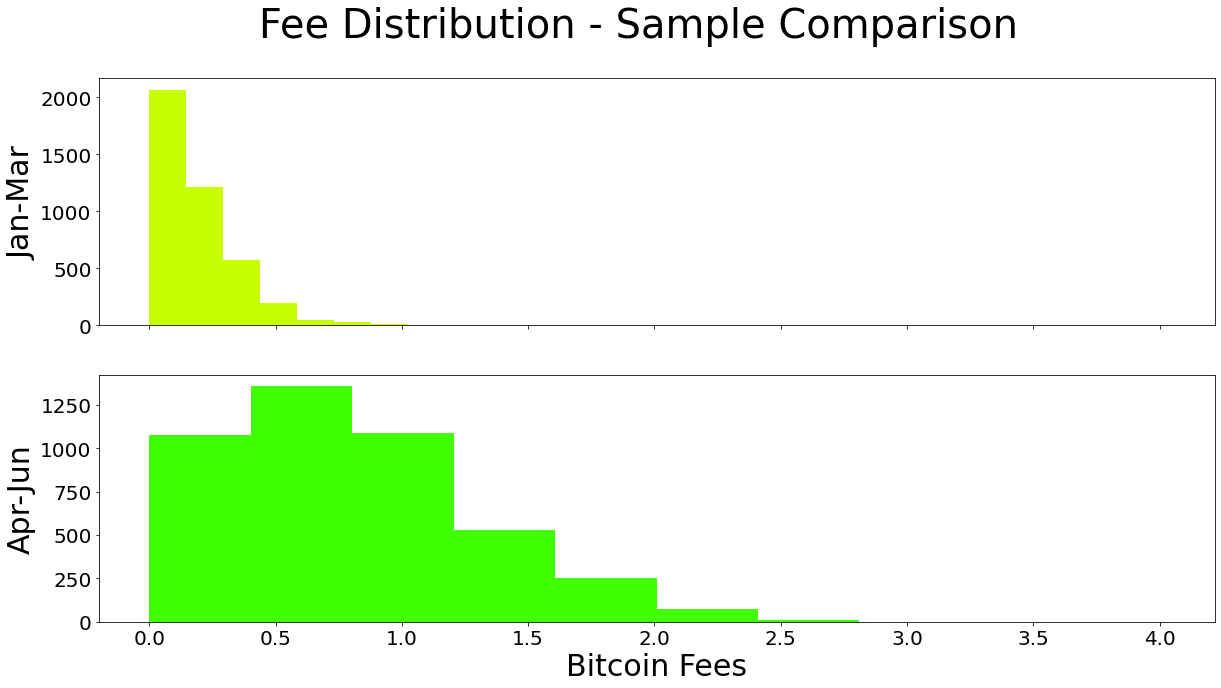

In [11]:
# A visualization of the distribution between two samples 
fig, axs = plt.subplots(2, figsize=(20,10), sharex=True) # vertical stack

fig.suptitle('Fee Distribution - Sample Comparison', fontsize=40)
axs[0].hist(jan_mar['fees'], color='#c8ff00')
axs[1].hist(apr_jun['fees'], color='#40ff00')

axs[0].set_ylabel('Jan-Mar', fontsize=30)
axs[1].set_ylabel('Apr-Jun', fontsize=30)
axs[1].set_xlabel('Bitcoin Fees', fontsize=30)

axs[0].tick_params(axis = 'both', labelsize=20)
axs[1].tick_params(axis = 'both', labelsize=20)

plt.show()